Jupyter Notebook Walkthrough
1. Importing Libraries
2. Loading the Dataset
Here, the dataset movies.csv is loaded into a pandas DataFrame called df.

In [36]:
import pandas as pd

# Step 1: Reading the CSV File
# Load the movies dataset
df = pd.read_csv('movies.csv')

# Step 2: Inspecting the DataFrame
print("Column names in the DataFrame:")
print(df.columns.tolist())  # Print column names as a list

# Display the first few rows of the data for reference
print("First few rows of the DataFrame:")
print(df.head())

Column names in the DataFrame:
['Movie Title', 'Year', 'Genre', 'Critic Name', 'Rating', 'Review Text', 'Runtime', 'Director', 'Cast', 'Awards']
First few rows of the DataFrame:
                Movie Title  Year       Genre   Critic Name Rating  \
0  The Shawshank Redemption  1994       Drama   Roger Ebert    4.5   
1             The Godfather  1972       Crime   Gene Siskel      4   
2          Schindler's List  1993  Historical  Pauline Kael    4.5   
3                       ...   ...         ...           ...    ...   

                        Review Text      Runtime              Director  \
0  A masterpiece of storytelling...  142 minutes        Frank Darabont   
1            A classic film that...  175 minutes  Francis Ford Coppola   
2          A powerful and moving...  195 minutes      Steven Spielberg   
3                               ...          ...                   ...   

                                       Cast  \
0   Tim Robbins, Morgan Freeman, Bob Gunton   
1     

The "Cast" column, which contains actors' names separated by commas, is split into three new columns: Actor1, Actor2, and Actor3. This makes it easier to analyze the individual actors involved in each movie.

3. Splitting the Cast Information

In [37]:
df[['Actor1', 'Actor2', 'Actor3']] = df['Cast'].str.split(',', expand=True)

The "Rating" column is printed to inspect its content. This will reveal the ratings associated with each movie, which may include some non-numeric data. In this case, there are some values causing issues for further analysis.

4. Inspecting the Ratings

In [38]:
print(df['Rating'])

0    4.5
1      4
2    4.5
3    ...
Name: Rating, dtype: object


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Reading the CSV File
# Load the movies dataset
df = pd.read_csv('movies.csv')

# Display the first few rows of the data
print("First few rows of the DataFrame:")
print(df.head())

# Step 2: Data Cleaning and Preprocessing
# Check the column names in the DataFrame
print("Column names in the DataFrame:")
print(df.columns)

# Drop rows with missing values
df.dropna(inplace=True)

# Check for duplicates and remove them if necessary
df.drop_duplicates(inplace=True)

# Convert the 'release_year' to integer if it's not already
release_year_col = 'release_year'  # Update this with the correct name if different
if release_year_col in df.columns:
    df[release_year_col] = df[release_year_col].astype(int)
else:
    print(f"Column '{release_year_col}' does not exist in the DataFrame.")

# Display cleaned data
print("DataFrame info after cleaning:")
print(df.info())

# Step 3: Bas

First few rows of the DataFrame:
                Movie Title  Year       Genre   Critic Name Rating  \
0  The Shawshank Redemption  1994       Drama   Roger Ebert    4.5   
1             The Godfather  1972       Crime   Gene Siskel      4   
2          Schindler's List  1993  Historical  Pauline Kael    4.5   
3                       ...   ...         ...           ...    ...   

                        Review Text      Runtime              Director  \
0  A masterpiece of storytelling...  142 minutes        Frank Darabont   
1            A classic film that...  175 minutes  Francis Ford Coppola   
2          A powerful and moving...  195 minutes      Steven Spielberg   
3                               ...          ...                   ...   

                                       Cast  \
0   Tim Robbins, Morgan Freeman, Bob Gunton   
1      Marlon Brando, Al Pacino, James Caan   
2  Liam Neeson, Ralph Fiennes, Ben Kingsley   
3                                       ...   

         

Extracting numeric values from the 'Rating' column
The 'Rating' column may contain non-numeric characters or be formatted inconsistently
Using a regular expression, we extract only the numeric values in the format of digits followed by a decimal point (e.g., '8.5')
The extract() function captures the first occurrence of this pattern in each cell
expand=False ensures that the result is a Series, not a DataFrame, so it can be reassigned back to the 'Rating' column

In [40]:
df['Rating'] = df['Rating'].str.extract(r'(\d+\.\d+)', expand=False)

Converting the 'Rating' column to numeric
After extracting numeric values, the 'Rating' column is still a string (object) type
We use pd.to_numeric() to convert it to a numeric data type (float)
The 'errors' parameter is set to 'coerce', meaning any invalid values (non-numeric) will be replaced with NaN
This step ensures that the column can be used for numerical calculations and analyses

In [41]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

Calculating the average movie rating
After converting the 'Rating' column to numeric, we can now calculate the mean (average) of all ratings
The mean() function automatically handles any NaN values, skipping them in the calculation
The result is stored in the 'avg_rating' variable

In [42]:
avg_rating = df['Rating'].mean()
print(f'Average Rating: {avg_rating}')

Average Rating: 4.5


Check for Missing Values: Check how many missing values exist in each column:

Inspect Unique Values: To understand the data better, check the unique values in critical columns like Year, Genre, and Rating:

In [50]:
# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

# Inspect unique values in critical columns
print("Unique Years:")
print(df['Year'].unique())

print("Unique Genres:")
print(df['Genre'].unique())

print("Unique Ratings:")
print(df['Rating'].unique())

Missing values in each column:
Movie Title    0
Year           0
Genre          0
Critic Name    0
Rating         0
Review Text    0
Runtime        0
Director       0
Cast           0
Awards         0
dtype: int64
Unique Years:
[1994 1972 1993]
Unique Genres:
['Drama' 'Crime' 'Historical']
Unique Ratings:
['4.5' '4']


First few rows of the DataFrame:
                Movie Title  Year       Genre   Critic Name Rating  \
0  The Shawshank Redemption  1994       Drama   Roger Ebert    4.5   
1             The Godfather  1972       Crime   Gene Siskel      4   
2          Schindler's List  1993  Historical  Pauline Kael    4.5   
3                       ...   ...         ...           ...    ...   

                        Review Text      Runtime              Director  \
0  A masterpiece of storytelling...  142 minutes        Frank Darabont   
1            A classic film that...  175 minutes  Francis Ford Coppola   
2          A powerful and moving...  195 minutes      Steven Spielberg   
3                               ...          ...                   ...   

                                       Cast  \
0   Tim Robbins, Morgan Freeman, Bob Gunton   
1      Marlon Brando, Al Pacino, James Caan   
2  Liam Neeson, Ralph Fiennes, Ben Kingsley   
3                                       ...   

         

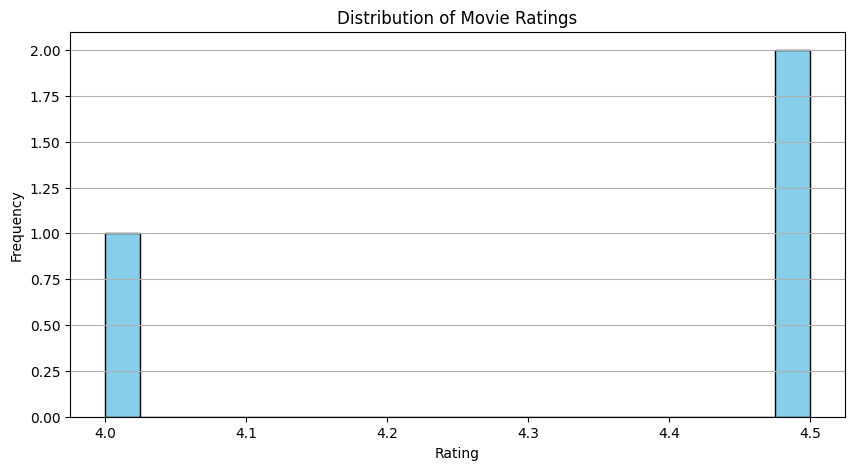

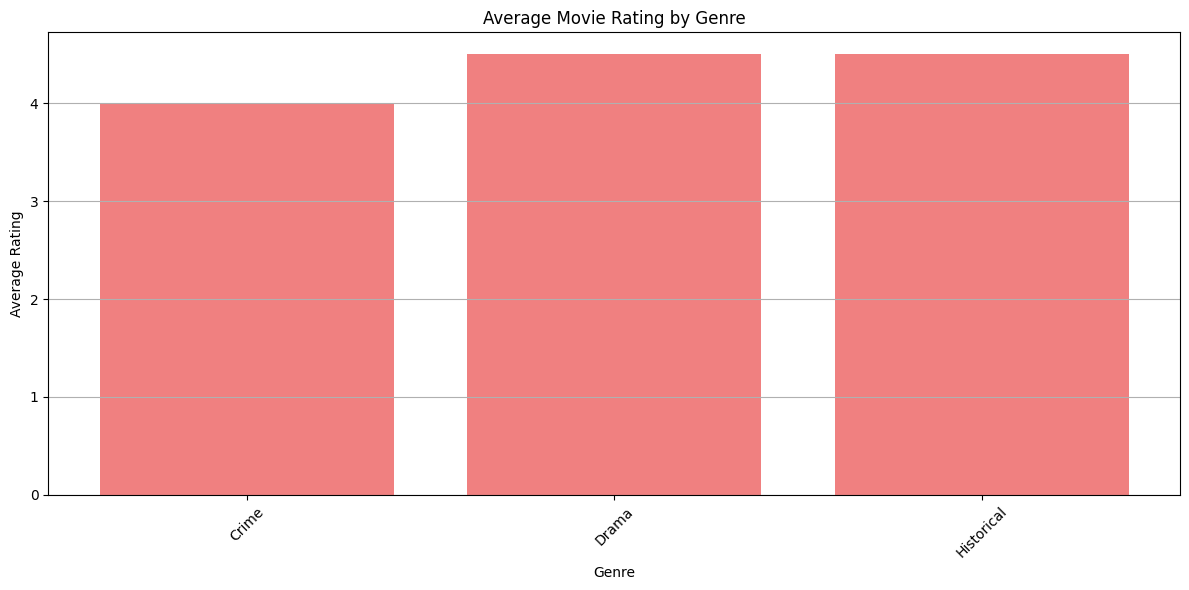

Genre with the highest average rating: Drama with an average rating of 4.50.


In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Reading the CSV File
df = pd.read_csv('movies.csv')

# Step 2: Data Cleaning and Preprocessing
# Display the first few rows of the data
print("First few rows of the DataFrame:")
print(df.head())

# Check the column names in the DataFrame
print("Column names in the DataFrame:")
print(df.columns.tolist())

# Drop rows with missing values
df.dropna(inplace=True)

# Check for duplicates and remove them if necessary
df.drop_duplicates(inplace=True)

# Clean the 'Year' column
year_col = 'Year'  # The actual column name for the release year
if year_col in df.columns:
    df[year_col] = pd.to_numeric(df[year_col], errors='coerce')
    df.dropna(subset=[year_col], inplace=True)  # Drop rows with NaN in 'Year'
    df[year_col] = df[year_col].astype(int)  # Now convert to int

# Clean the 'Rating' column
rating_col = 'Rating'  # The actual column name for ratings
if rating_col in df.columns:
    df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')  # Convert to numeric
    df.dropna(subset=[rating_col], inplace=True)  # Drop rows with NaN in 'Rating'
else:
    print(f"Column '{rating_col}' does not exist in the DataFrame.")

# Display cleaned data
print("DataFrame info after cleaning:")
print(df.info())

# Step 3: Basic Analysis

# a. Top Movies by Rating
if rating_col in df.columns:
    top_movies = df.nlargest(10, rating_col)
    print("Top 10 Movies by Rating:")
    print(top_movies[['Movie Title', rating_col]])  # Update 'title' with the actual column name
else:
    print(f"Column '{rating_col}' does not exist in the DataFrame.")

# b. Average Rating by Genre
average_rating_by_genre = None  # Initialize variable
if genre_col in df.columns and rating_col in df.columns:
    average_rating_by_genre = df.groupby(genre_col)[rating_col].mean().reset_index()
    print("Average Rating by Genre:")
    print(average_rating_by_genre)
else:
    print(f"Columns '{genre_col}' or '{rating_col}' do not exist in the DataFrame.")

# Step 4: Visualization

# a. Plotting Ratings Distribution
if rating_col in df.columns:
    plt.figure(figsize=(10, 5))
    plt.hist(df[rating_col], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Movie Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()
else:
    print(f"Column '{rating_col}' does not exist in the DataFrame.")

# b. Average Rating by Genre Bar Chart
if average_rating_by_genre is not None and genre_col in average_rating_by_genre.columns and rating_col in average_rating_by_genre.columns:
    plt.figure(figsize=(12, 6))
    plt.bar(average_rating_by_genre[genre_col], average_rating_by_genre[rating_col], color='lightcoral')
    plt.title('Average Movie Rating by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print(f"Cannot plot bar chart: Check if average_rating_by_genre was created successfully.")

# Step 5: Insights Extraction
if average_rating_by_genre is not None and genre_col in average_rating_by_genre.columns and rating_col in average_rating_by_genre.columns:
    highest_avg_genre = average_rating_by_genre.loc[average_rating_by_genre[rating_col].idxmax()]
    print(f"Genre with the highest average rating: {highest_avg_genre[genre_col]} with an average rating of {highest_avg_genre[rating_col]:.2f}.")
else:
    print(f"Cannot extract insights: Check if average_rating_by_genre was created successfully.")